### **Beijing PM2.5 Dataset for classification**

**Abstract:** 
<p>This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.</p>

**Attribute Information:**

|Attributte| Explanation                 ||Attributte| Explanation          |
|  :----   | :----                       ||  :----   | :----                |
|No.       | row number                  ||DEWP.| Dew Point (â„ƒ)           | 
|year.     | year of data in this row    ||TEMP | Temperature (â„ƒ)         | 
|month.    | month of data in this row   ||PRES.| Pressure (hPa)            | 
|day.      | day of data in this row     ||cbwd.| Combined wind direction   | 
|hour.     | hour of data in this row    ||Iws. | Cumulated wind speed (m/s)| 
|pm2.5.    | PM2.5 concentration (ug/m^3)||Is.  | Cumulated hours of snow   | 
|.         |                             ||Ir.  | Cumulated hours of rain   | 

**Data source:**
<p>Liang, X., Zou, T., Guo, B., Li, S., Zhang, H., Zhang, S., Huang, H. and Chen, S. X. (2015). Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society A, 471, 20150257.</p>

In [109]:
# Environment Preparation
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.2


**Data Pre-processing:**

*   Data Cleaning
*   Feature Selection
*   Data Split
*   Data Normalisation


                     pm2.5  DEWP  TEMP    PRES   Iws  Is  Ir  NE  NW  SE  cv
time                                                                        
2010-01-02 00:00:00  129.0   -16  -4.0  1020.0  1.79   0   0   0   0   1   0
2010-01-02 01:00:00  148.0   -15  -4.0  1020.0  2.68   0   0   0   0   1   0
2010-01-02 02:00:00  159.0   -11  -5.0  1021.0  3.57   0   0   0   0   1   0
2010-01-02 03:00:00  181.0    -7  -5.0  1022.0  5.36   1   0   0   0   1   0
2010-01-02 04:00:00  138.0    -7  -5.0  1022.0  6.25   2   0   0   0   1   0


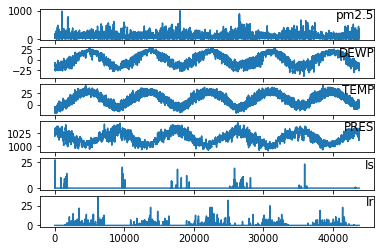

((35040, 10), (35040, 1), (8760, 10), (8760, 1))

In [110]:
import pandas as pd
import numpy as np
import datetime
import time
from matplotlib import pyplot

# load raw data
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_COMP3009/CW1/regression/pm2dot5.csv")

# clean data with missing values          
'''drop the rows directly -> mess up the order
   first 24 rows have pm2.5 value that is NaN -> discard
   else: forward filling'''
df = df[24:].fillna(method='ffill')

# integrate 'year', 'month', 'day', 'hour', 'No' as one attribute
df['time'] = df.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)
df.drop(columns=['year', 'month', 'day', 'hour', 'No'], inplace=True)
df = df.set_index('time')

# expand "cbwd" into 4 attributes 'SE', 'cv', 'NW', 'NE'
df = df.join(pd.get_dummies(df['cbwd'])) # one-hot encoding
del df['cbwd']

# df = df.drop('cbwd', axis = 1) # remove the attribute temporarily
print(df.head())

values = df.values;
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6]
i = 1
# plotting each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

X_ = df.iloc[:,1:].astype(np.float32)
y_ = df['pm2.5'].astype(np.float32).to_frame()

# split the data
from sklearn.model_selection import train_test_split
# def train_test_val_split(data, ratio_train, ratio_test, ratio_val):
#     train, middle = train_test_split(data, train_size=ratio_train, test_size=ratio_test + ratio_val)
#     ratio = ratio_val/(1-ratio_train)
#     test, validation = train_test_split(middle, test_size=ratio)
#     return train, test, validation
# (X_train, y_train),(X_test, y_test),(X_val, y_val) = train_test_val_split((X.values, y.values), 0.6, 0.2, 0.2)
X_train, X_test, y_train, y_test = train_test_split(X_.values, y_.values, test_size=0.2,shuffle=True)

# normalisation
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std # Use the mean & std of train. Since there's no way for us to know the future.

mean = y_train.mean(axis=0)
std = y_train.std(axis=0)
y_train = (y_train - mean) / std
y_test = (y_test - mean) / std # Use the mean & std of train. Since there's no way for us to know the future.

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train= scaler.fit_transform(X_train.astype(np.float32))
# y_train= scaler.fit_transform(y_train.astype(np.float32))
# X_test= scaler.transform(X_test.astype(np.float32))
# y_test= scaler.transform(y_test.astype(np.float32))

X_train.shape, y_train.shape, X_test.shape, y_test.shape

# print(X_train)


Artificial Neural Network Configuration

In [111]:
#Network parameters
n_input = 10 # 6
n_hidden1, n_hidden2 = 10, 10
n_output = 1
#Learning parameters 
learning_constant = 0.0001
number_epochs = 10000

#Defining the input and the output
X = tf.placeholder("float", [None, n_input]) 
Y = tf.placeholder("float", [None, n_output])
#DEFINING WEIGHTS AND BIASES
b1 = tf.Variable(tf.random_normal([n_hidden1])) #Biases first hidden layer
b2 = tf.Variable(tf.random_normal([n_hidden2])) #Biases second hidden layer
b3 = tf.Variable(tf.random_normal([n_output]))  #Biases output layer
#Weights connecting input layer with first hidden layer
w1 = tf.Variable(tf.random_normal([n_input, n_hidden1])) #Weights connecting first hidden layer with second hidden layer 
w2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2])) #Weights connecting second hidden layer with output layer
w3 = tf.Variable(tf.random_normal([n_hidden2, n_output]))

# forward
def multilayer_perceptron(input_d):
  #Task of neurons of first hidden layer
  layer_1 = tf.nn.relu(tf.add(tf.matmul(input_d, w1), b1)) #Task of neurons of second hidden layer
  layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, w2), b2)) #Task of neurons of output layer
  out_layer = tf.add(tf.matmul(layer_2, w3),b3)
  
  return out_layer

# create model
neural_network = multilayer_perceptron(X)
# define loss function
# loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_network,labels=Y))
loss_op = tf.reduce_mean(tf.math.squared_difference(neural_network,Y))
# define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_constant).minimize(loss_op)

# initializaing variables
init = tf.global_variables_initializer()


Training the model

Epoch:0 Loss:555.7735
Epoch:1000 Loss:2.1549273
Epoch:2000 Loss:1.7188383
Epoch:3000 Loss:1.4948128
Epoch:4000 Loss:1.3483797
Epoch:5000 Loss:1.248776
Epoch:6000 Loss:1.178945
Epoch:7000 Loss:1.1325247
Epoch:8000 Loss:1.1025211
Epoch:9000 Loss:1.0834192
The totoal training time is: 21.999738999999977


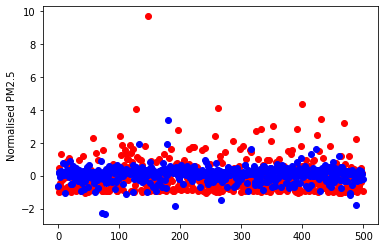

Average precison: 0.8507991


In [112]:
with tf.Session() as sess: 
  start_time = time.clock()
  sess.run(init)
  #Training epoch
  for epoch in range(number_epochs):
    sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
    #Display the epoch
    if epoch % 1000 == 0:
      print("Epoch:" + str(epoch) + " Loss:" + str(sess.run(loss_op, feed_dict={X: X_train, Y: y_train})))
  end_time = time.clock()
  print("The totoal training time is: " + str(end_time-start_time))
  
  # Test model
  pred = (neural_network) # Apply softmax to logits 
  accuracy=tf.keras.losses.MSE(pred,y_test) 
  # print("Accuracy:", accuracy.eval({X: batch_x_train, Y: batch_y_train})) 
  # #tf.keras.evaluate(pred,batch_x)
  # print("Prediction:", pred.eval({X: batch_x_train})) 
  
  output=neural_network.eval({X: X_test}) 
  pyplot.plot(y_test[0:500], 'ro', output[0:500], 'bo') 
  pyplot.ylabel('Normalised PM2.5')
  pyplot.show()

  estimated_class=tf.argmax(pred, 1)#+1e-50-1e-50
  correct_prediction1 = tf.equal(tf.argmax(pred, 1),y_test)
  accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))

  print("Average precison: " + str(accuracy1.eval({X: X_test})))